## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

**Load the data into pandas dataframe . Load the Boston Housing DataSet from data/boston_house_prices.csv**

In [37]:
df = pd.read_csv('data/boston_house_prices.csv', header = 1)

**Data preprocessing**

Check for missing values in all the columns

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Data Visualization**

In [40]:
#sns.pairplot(df)

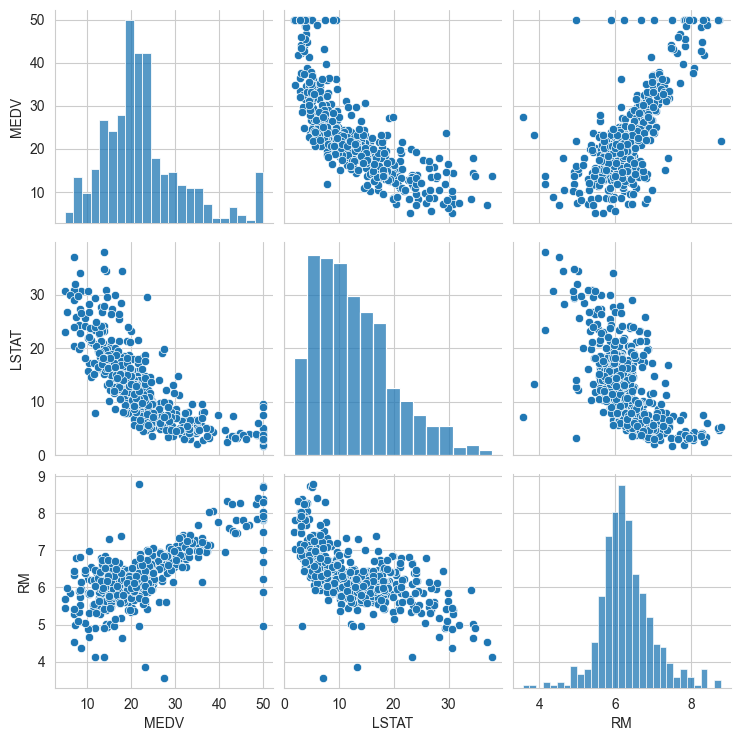

In [41]:
sns.pairplot(df, vars=['MEDV', 'LSTAT', 'RM'])

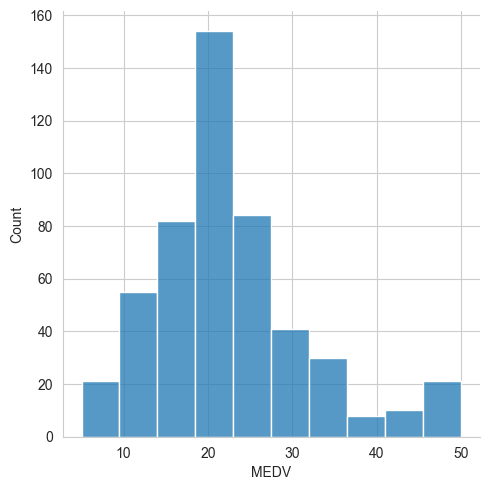

In [42]:
sns.displot(df['MEDV'], bins=10);

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [43]:
#Displaying correlation among all the columns 
df.corr(numeric_only=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


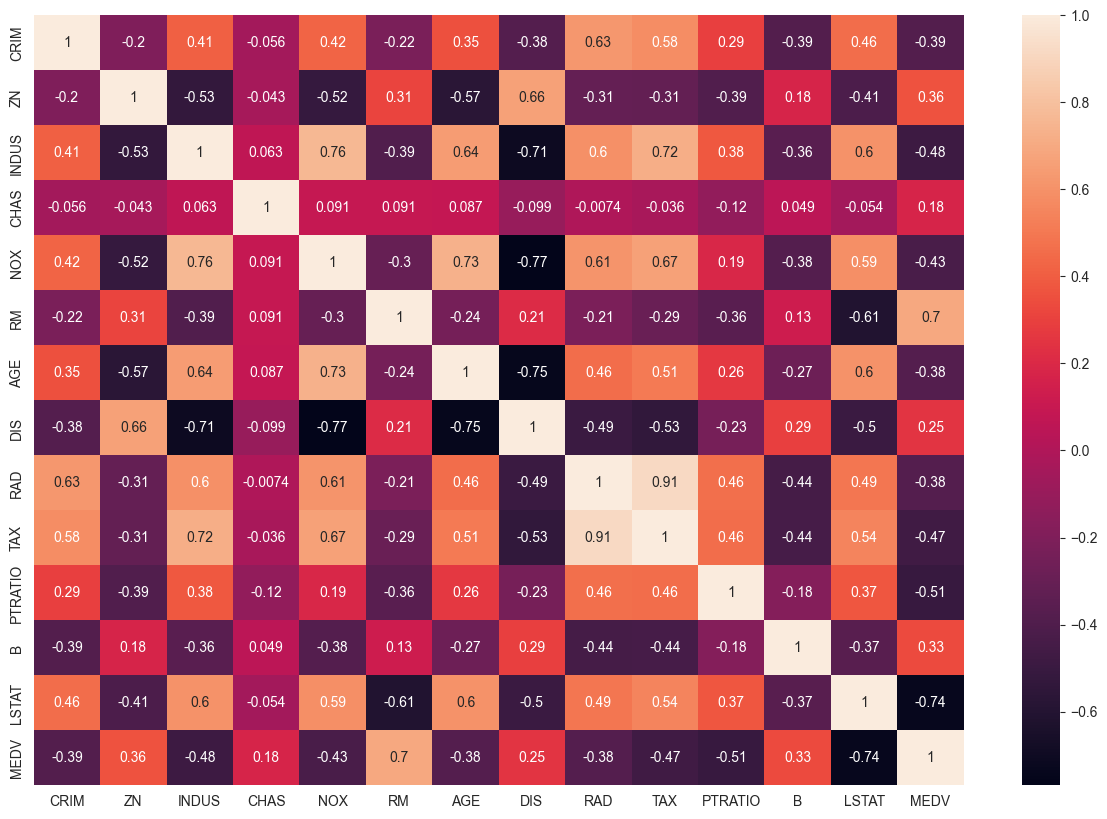

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

* LSTAT y RM son las variables más correladas con el target.

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

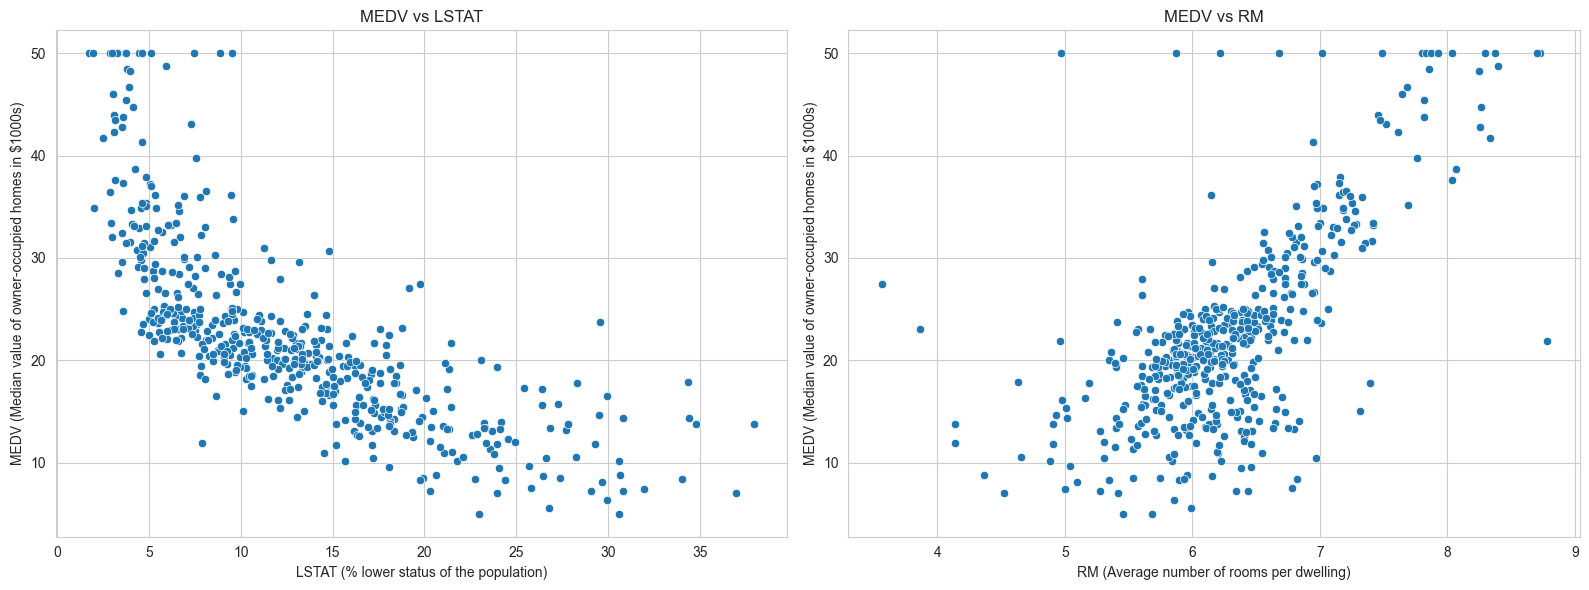

In [45]:
# Set up the plot style
sns.set_style("whitegrid")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot MEDV vs LSTAT
sns.scatterplot(data=df, x='LSTAT', y='MEDV', ax=ax1)
ax1.set_title('MEDV vs LSTAT')
ax1.set_xlabel('LSTAT (% lower status of the population)')
ax1.set_ylabel('MEDV (Median value of owner-occupied homes in $1000s)')

# Plot MEDV vs RM
sns.scatterplot(data=df, x='RM', y='MEDV', ax=ax2)
ax2.set_title('MEDV vs RM')
ax2.set_xlabel('RM (Average number of rooms per dwelling)')
ax2.set_ylabel('MEDV (Median value of owner-occupied homes in $1000s)')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [46]:
# Crear el dataframe X con las columnas LSTAT y RM
X = df[['LSTAT', 'RM']]

# Crear la serie Y con los valores objetivo MEDV
Y = df['MEDV']

# Verificar la preparación de los datos
print("Dimensiones de X:", X.shape)
print("Dimensiones de Y:", Y.shape)

print("\nPrimeras filas de X:")
print(X.head())

print("\nPrimeros valores de Y:")
print(Y.head())

# Información adicional sobre los datos
print("\nEstadísticas descriptivas de X:")
print(X.describe())

print("\nEstadísticas descriptivas de Y:")
print(Y.describe())

Dimensiones de X: (506, 2)
Dimensiones de Y: (506,)

Primeras filas de X:
   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147

Primeros valores de Y:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Estadísticas descriptivas de X:
            LSTAT          RM
count  506.000000  506.000000
mean    12.653063    6.284634
std      7.141062    0.702617
min      1.730000    3.561000
25%      6.950000    5.885500
50%     11.360000    6.208500
75%     16.955000    6.623500
max     37.970000    8.780000

Estadísticas descriptivas de Y:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64


**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Imprimir las formas de los objetos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de Y_train:", Y_train.shape)
print("Forma de Y_test:", Y_test.shape)

# Información adicional sobre la división
print("\nNúmero total de muestras:", len(X))
print("Número de muestras de entrenamiento:", len(X_train))
print("Número de muestras de prueba:", len(X_test))
print("Porcentaje de datos de entrenamiento: {:.2f}%".format(len(X_train) / len(X) * 100))
print("Porcentaje de datos de prueba: {:.2f}%".format(len(X_test) / len(X) * 100))

# Verificar que la división sea correcta
assert len(X_train) + len(X_test) == len(X), "La suma de las muestras de entrenamiento y prueba debe ser igual al total de muestras"

# Mostrar algunas estadísticas básicas para verificar la distribución
print("\nEstadísticas de Y_train:")
print(Y_train.describe())
print("\nEstadísticas de Y_test:")
print(Y_test.describe())

Forma de X_train: (404, 2)
Forma de X_test: (102, 2)
Forma de Y_train: (404,)
Forma de Y_test: (102,)

Número total de muestras: 506
Número de muestras de entrenamiento: 404
Número de muestras de prueba: 102
Porcentaje de datos de entrenamiento: 79.84%
Porcentaje de datos de prueba: 20.16%

Estadísticas de Y_train:
count    404.000000
mean      22.796535
std        9.332147
min        5.000000
25%       16.950000
50%       21.600000
75%       26.400000
max       50.000000
Name: MEDV, dtype: float64

Estadísticas de Y_test:
count    102.000000
mean      21.488235
std        8.605804
min        5.000000
25%       17.125000
50%       20.150000
75%       24.075000
max       50.000000
Name: MEDV, dtype: float64


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#creating LinearRegression Object
lm = LinearRegression()

In [50]:
#Training the Data Model
lm.fit(X_train, Y_train)

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [51]:
print(lm.intercept_)

-3.841177079004872


In [52]:
print(lm.coef_)

[-0.63249856  5.46509877]


In [53]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
LSTAT,-0.632499
RM,5.465099


In [54]:
X_test

,LSTAT,RM
173,9.04,6.416
274,3.53,6.758
491,18.07,5.983
72,5.52,6.065
452,17.27,6.297
...,...,...
412,34.37,4.628
436,18.05,6.461
411,21.22,6.657
86,12.86,6.015


In [55]:
predictions = lm.predict(X_test)
predictions

array([25.50510964, 30.8592405 , 17.42725985, 25.81325491, 19.64929972,
       22.90317032, 16.88571841, 14.61917747, 22.06066668, 20.03326882,
       17.34725148, 18.15555053, -2.53419257, 22.41228621, 19.92807359,
       26.93027912, 17.16881388,  3.46139894, 37.31795503, 18.49325989,
       26.09287374, 27.0359285 , 13.08646469, 26.07395803, 19.05197872,
       14.34439003, 22.50507619, 21.09395936, 17.80756143, 18.90537548,
       17.3189494 , 26.72355799, 27.62430957, 19.01752219, 15.4809415 ,
       17.37191951, 32.8765884 , 22.03500171, 20.02675295, 25.5193256 ,
       12.24468569, 28.82657024, 38.2438306 , 18.45117927, 25.65604941,
       16.5588818 , 15.7090024 , 26.97797141, 19.55868547, 28.94200451,
       20.60534552, 31.33646277, 17.88508649, 28.36639373, 34.9844153 ,
       23.96269158, 19.65312104, 31.54864539, 24.99070281, 15.11477808,
       27.10508448, 32.73300584, 29.58795549, 18.58249363, 28.64129064,
       10.75991895, 20.69510169, 26.34948505, 29.46875554, 16.79

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

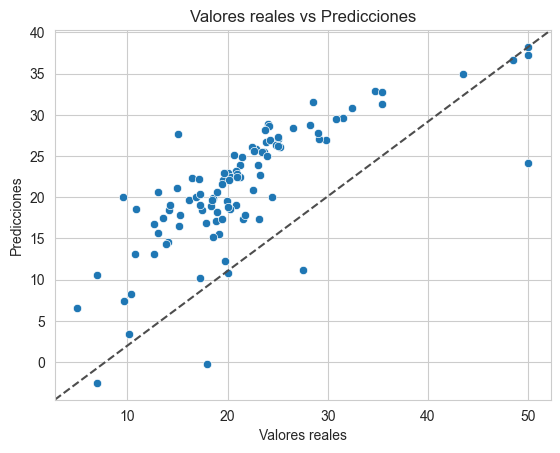

In [56]:
# Crear el gráfico de dispersión
sns.scatterplot(x=Y_test, y=predictions)

# Obtener los límites actuales del gráfico
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# Crear una línea diagonal perfecta
plt.plot(xlim, ylim, ls="--", c=".3")

# Ajustar los límites del gráfico para que incluyan todos los puntos
plt.xlim(xlim)
plt.ylim(ylim)

# Añadir etiquetas y título
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')

# Mostrar el gráfico
plt.show()

In [57]:
from sklearn import metrics

lm.score(X_test, Y_test)

0.5739577415025858

In [60]:
lm.score(X_train, Y_train)

0.6501592679428922

In [59]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 3.898759721382358
MSE: 31.243290601783627
RMSE: 5.589569804715174


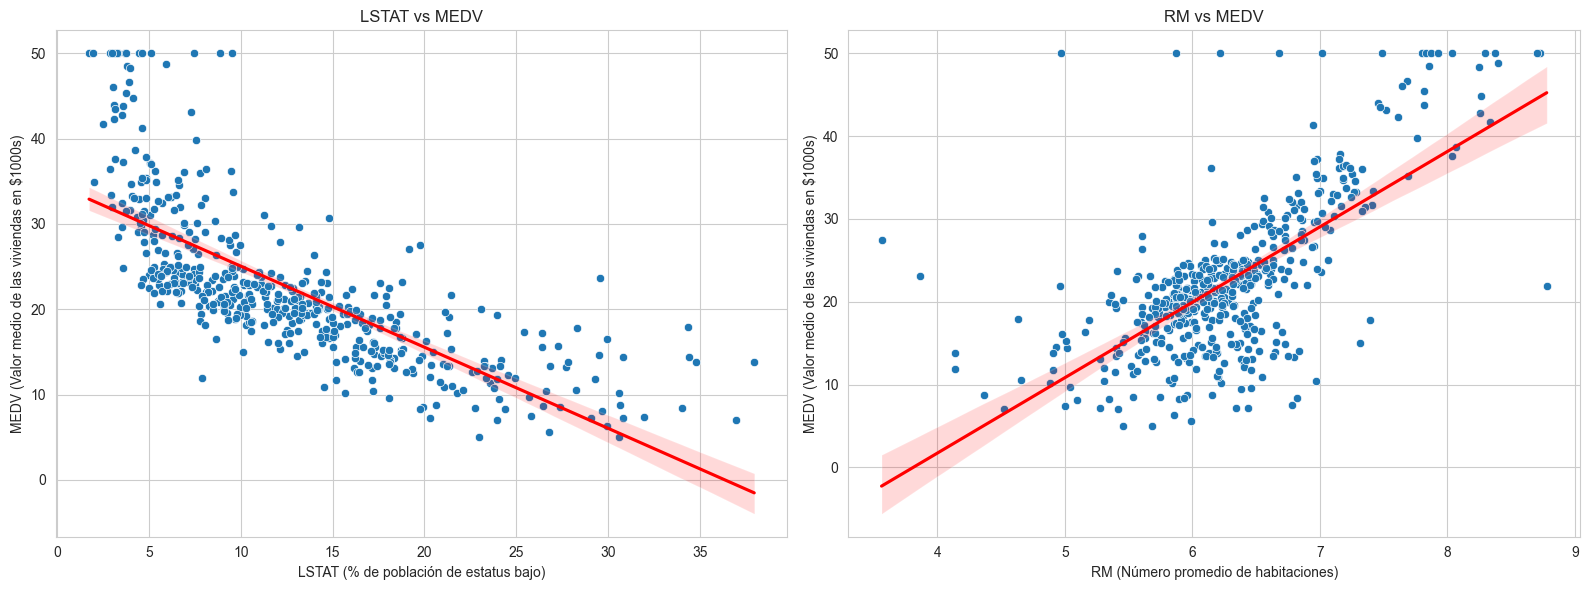

In [ ]:
# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para LSTAT vs MEDV
sns.scatterplot(x='LSTAT', y='MEDV', data=df, ax=ax1)
sns.regplot(x='LSTAT', y='MEDV', data=df, ax=ax1, scatter=False, color='red')
ax1.set_title('LSTAT vs MEDV')
ax1.set_xlabel('LSTAT (% de población de estatus bajo)')
ax1.set_ylabel('MEDV (Valor medio de las viviendas en $1000s)')

# Gráfico para RM vs MEDV
sns.scatterplot(x='RM', y='MEDV', data=df, ax=ax2)
sns.regplot(x='RM', y='MEDV', data=df, ax=ax2, scatter=False, color='red')
ax2.set_title('RM vs MEDV')
ax2.set_xlabel('RM (Número promedio de habitaciones)')
ax2.set_ylabel('MEDV (Valor medio de las viviendas en $1000s)')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[ 1.      ,  4.98    ,  6.575   , 24.8004  , 32.7435  , 43.230625],
       [ 1.      ,  9.14    ,  6.421   , 83.5396  , 58.68794 , 41.229241],
       [ 1.      ,  4.03    ,  7.185   , 16.2409  , 28.95555 , 51.624225],
       ...,
       [ 1.      ,  5.64    ,  6.976   , 31.8096  , 39.34464 , 48.664576],
       [ 1.      ,  6.48    ,  6.794   , 41.9904  , 44.02512 , 46.158436],
       [ 1.      ,  7.88    ,  6.03    , 62.0944  , 47.5164  , 36.3609  ]])

In [ ]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression()

In [ ]:
pol_reg.coef_

array([ 0.00000000e+00,  3.71029715e-01, -1.53603971e+01,  9.13586658e-03,
       -2.31206282e-01,  1.72825540e+00])

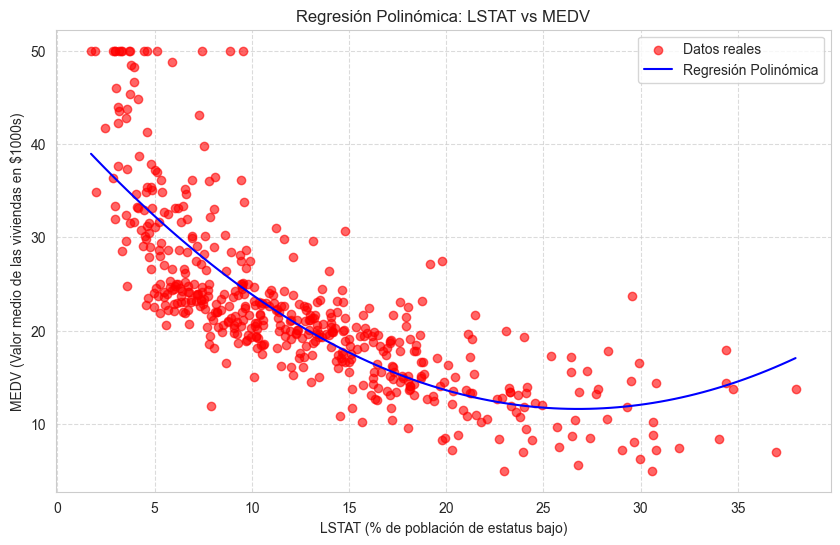

In [ ]:
def viz_polynomial():
    # Ordenar los datos por LSTAT para una línea suave
    X_sorted = X['LSTAT'].sort_values()
    Y_sorted = Y[X_sorted.index]

    # Crear características polinómicas
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X_sorted.values.reshape(-1, 1))

    # Ajustar el modelo polinómico
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y_sorted)

    # Crear puntos para la línea de predicción
    X_range = np.linspace(X_sorted.min(), X_sorted.max(), 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)

    # Visualización
    plt.figure(figsize=(10, 6))
    plt.scatter(X_sorted, Y_sorted, color='red', alpha=0.6, label='Datos reales')
    plt.plot(X_range, pol_reg.predict(X_range_poly), color='blue', label='Regresión Polinómica')
    plt.title('Regresión Polinómica: LSTAT vs MEDV')
    plt.xlabel('LSTAT (% de población de estatus bajo)')
    plt.ylabel('MEDV (Valor medio de las viviendas en $1000s)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    return

viz_polynomial()

**Did the model improve using the Polynomial model?**

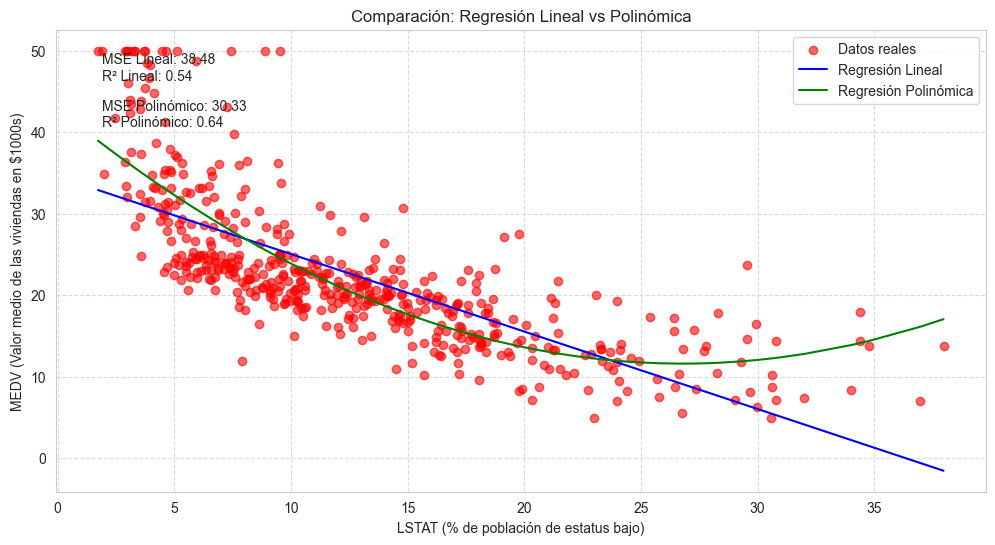

MSE Lineal: 38.4830
R² Lineal: 0.5441
MSE Polinómico: 30.3305
R² Polinómico: 0.6407


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Asumiendo que ya tienes X (LSTAT) e Y (MEDV) definidos

# Ordenar los datos para una visualización más clara
X_sorted = X['LSTAT'].sort_values()
Y_sorted = Y[X_sorted.index]

# Reshape para sklearn
X_reshaped = X_sorted.values.reshape(-1, 1)

# Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_reshaped, Y_sorted)
Y_pred_linear = linear_reg.predict(X_reshaped)

# Regresión Polinómica
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_reshaped)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y_sorted)
Y_pred_poly = poly_reg.predict(X_poly)

# Calcular métricas
mse_linear = mean_squared_error(Y_sorted, Y_pred_linear)
r2_linear = r2_score(Y_sorted, Y_pred_linear)

mse_poly = mean_squared_error(Y_sorted, Y_pred_poly)
r2_poly = r2_score(Y_sorted, Y_pred_poly)

# Visualización
plt.figure(figsize=(12, 6))
plt.scatter(X_sorted, Y_sorted, color='red', alpha=0.6, label='Datos reales')
plt.plot(X_sorted, Y_pred_linear, color='blue', label='Regresión Lineal')
plt.plot(X_sorted, Y_pred_poly, color='green', label='Regresión Polinómica')
plt.title('Comparación: Regresión Lineal vs Polinómica')
plt.xlabel('LSTAT (% de población de estatus bajo)')
plt.ylabel('MEDV (Valor medio de las viviendas en $1000s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar métricas
plt.text(0.05, 0.95, f'MSE Lineal: {mse_linear:.2f}\nR² Lineal: {r2_linear:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.05, 0.85, f'MSE Polinómico: {mse_poly:.2f}\nR² Polinómico: {r2_poly:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

print(f"MSE Lineal: {mse_linear:.4f}")
print(f"R² Lineal: {r2_linear:.4f}")
print(f"MSE Polinómico: {mse_poly:.4f}")
print(f"R² Polinómico: {r2_poly:.4f}")

**Did the model improve using the Polynomial model with degree 3? Or more?**

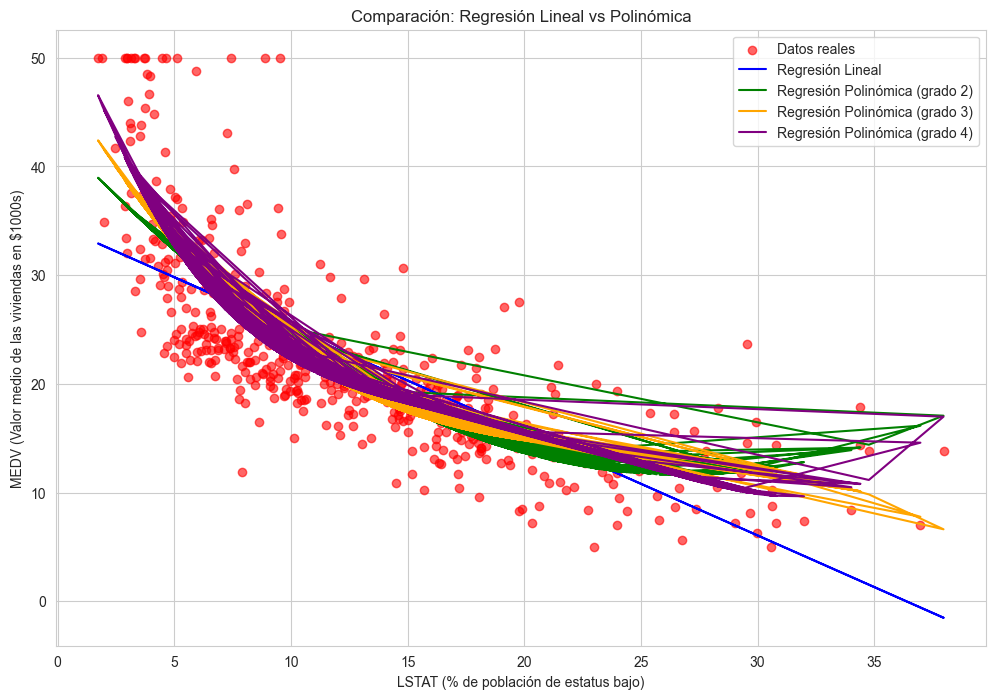

MSE Lineal: 38.4830, R² Lineal: 0.5441
MSE Polinómico (grado 2): 30.3305, R² Polinómico (grado 2): 0.6407
MSE Polinómico (grado 3): 28.8844, R² Polinómico (grado 3): 0.6578
MSE Polinómico (grado 4): 27.6041, R² Polinómico (grado 4): 0.6730


In [ ]:
# Reshape para sklearn
X_reshaped = X['LSTAT'].values.reshape(-1, 1)

# Regresión Lineal
linear_reg = LinearRegression()
linear_reg.fit(X_reshaped, Y)
Y_pred_linear = linear_reg.predict(X_reshaped)

# Regresión Polinómica de grado 2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_reshaped)

poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly_2, Y)
Y_pred_poly_2 = poly_reg_2.predict(X_poly_2)

# Regresión Polinómica de grado 3
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_reshaped)

poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_poly_3, Y)
Y_pred_poly_3 = poly_reg_3.predict(X_poly_3)

# Regresión Polinómica de grado 4
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X_reshaped)

poly_reg_4 = LinearRegression()
poly_reg_4.fit(X_poly_4, Y)
Y_pred_poly_4 = poly_reg_4.predict(X_poly_4)

# Calcular métricas para cada modelo
mse_linear = mean_squared_error(Y, Y_pred_linear)
r2_linear = r2_score(Y, Y_pred_linear)

mse_poly_2 = mean_squared_error(Y, Y_pred_poly_2)
r2_poly_2 = r2_score(Y, Y_pred_poly_2)

mse_poly_3 = mean_squared_error(Y, Y_pred_poly_3)
r2_poly_3 = r2_score(Y, Y_pred_poly_3)

mse_poly_4 = mean_squared_error(Y, Y_pred_poly_4)
r2_poly_4 = r2_score(Y, Y_pred_poly_4)

# Visualización
plt.figure(figsize=(12, 8))
plt.scatter(X['LSTAT'], Y, color='red', alpha=0.6, label='Datos reales')
plt.plot(X['LSTAT'], Y_pred_linear, color='blue', label='Regresión Lineal')
plt.plot(X['LSTAT'], Y_pred_poly_2, color='green', label='Regresión Polinómica (grado 2)')
plt.plot(X['LSTAT'], Y_pred_poly_3, color='orange', label='Regresión Polinómica (grado 3)')
plt.plot(X['LSTAT'], Y_pred_poly_4, color='purple', label='Regresión Polinómica (grado 4)')
plt.title('Comparación: Regresión Lineal vs Polinómica')
plt.xlabel('LSTAT (% de población de estatus bajo)')
plt.ylabel('MEDV (Valor medio de las viviendas en $1000s)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir métricas
print(f"MSE Lineal: {mse_linear:.4f}, R² Lineal: {r2_linear:.4f}")
print(f"MSE Polinómico (grado 2): {mse_poly_2:.4f}, R² Polinómico (grado 2): {r2_poly_2:.4f}")
print(f"MSE Polinómico (grado 3): {mse_poly_3:.4f}, R² Polinómico (grado 3): {r2_poly_3:.4f}")
print(f"MSE Polinómico (grado 4): {mse_poly_4:.4f}, R² Polinómico (grado 4): {r2_poly_4:.4f}")